# Search for Molecular Dynamics publications in PubMed

Results can be verified [here](https://pubmed.ncbi.nlm.nih.gov/?term=%22molecular+dynamics%22&filter=years.2000-2022&sort=date)

In [1]:
from Bio import Entrez
import matplotlib.pyplot as plt
import pandas as pd

Initiate Entrez module with your own e-mail address.

In [2]:
# Dummy e-mail address. Use your own.
Entrez.email = "bob@email.com"

Define function to query Pubmed per year

In [3]:
def query_pubmed(term="", year_start=2000, year_end=2022):
    years = []
    paper_count = []
    for year in range(year_start, year_end+1):
        query = (f'("{term}") AND '
                 f'("{year}/01/01"[Date - Publication] : "{year}/12/31"[Date - Publication])'
                )
        esearch_res = Entrez.read(Entrez.esearch(db="pubmed", term=query))
        years.append(year)
        paper_count.append(int(esearch_res["Count"]))
    return years, paper_count

## Molecular dynamics

In [4]:
print("Querying MD")
years, md = query_pubmed(term="'molecular dynamics'", year_start=2000, year_end=2022)
print("Querying MD + Gromacs")
years, gromacs = query_pubmed(term="'molecular dynamics' AND Gromacs", year_start=2000, year_end=2022)
print("Querying MD + AMBER")
years, amber = query_pubmed(term="'molecular dynamics' AND AMBER", year_start=2000, year_end=2022)
print("Querying MD + CHARMM")
years, charmm = query_pubmed(term="'molecular dynamics' AND CHARMM", year_start=2000, year_end=2022)
print("Querying MD + NAMD")
years, namd = query_pubmed(term="'molecular dynamics' AND NAMD", year_start=2000, year_end=2022)
print("Querying MD + OpenMM")
years, openmm = query_pubmed(term="'molecular dynamics' AND OpenMM", year_start=2000, year_end=2022)
print("Done")
df_md = pd.DataFrame({"years": years, "MD": md, "Gromacs": gromacs, "AMBER": amber, "CHARMM": charmm, "NAMD": namd, "OpenMM": openmm})
df_md.to_csv("number_of_MD_papers_per_year.tsv", sep="\t", index=False)
df_md.head()

Querying MD
Querying MD + Gromacs
Querying MD + AMBER
Querying MD + CHARMM
Querying MD + NAMD
Querying MD + OpenMM
Done


,years,MD,Gromacs,AMBER,CHARMM,NAMD,OpenMM
0,2000,578,0,15,5,0,0
1,2001,685,1,18,3,0,0
2,2002,843,0,17,11,0,0
3,2003,899,3,26,10,0,0
4,2004,1428,5,25,18,1,0


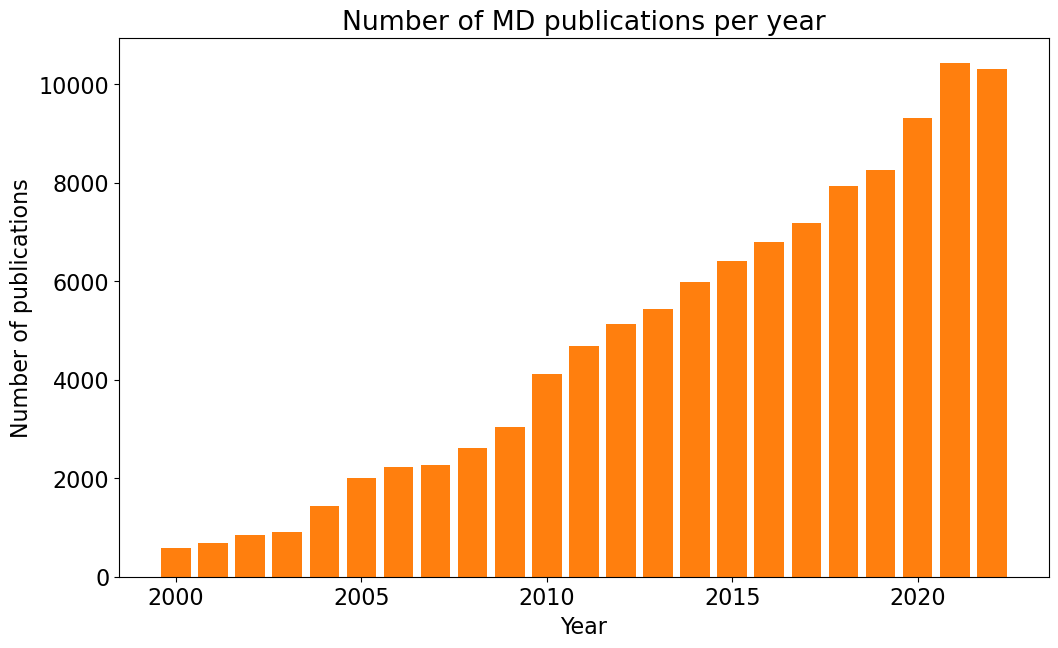

In [5]:
plt.rcParams.update({"font.size": 16})
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(df_md["years"], df_md["MD"], color="C1")
ax.set_title("Number of MD publications per year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of publications")
fig.savefig("fig/number_of_MD_papers_per_year.svg")

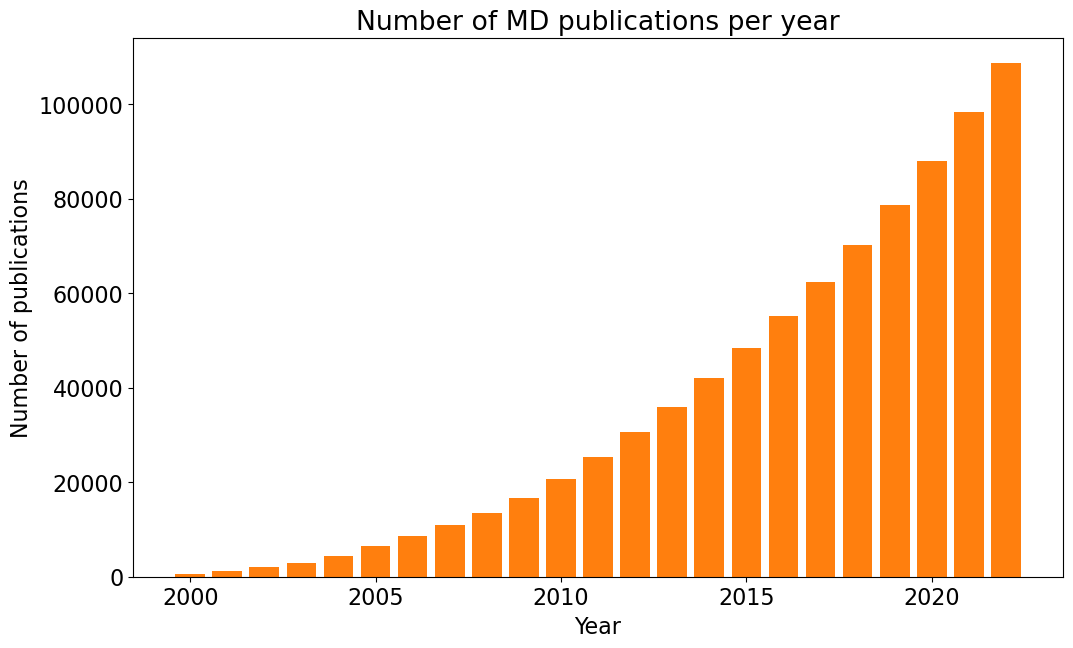

In [6]:
# Cumulative sum
plt.rcParams.update({"font.size": 16})
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(df_md["years"], df_md["MD"].cumsum(), color="C1")
ax.set_title("Number of MD publications per year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of publications")
fig.savefig("fig/number_of_MD_papers_per_year_cumsum.svg")

## Molecular dynamics + MD engine

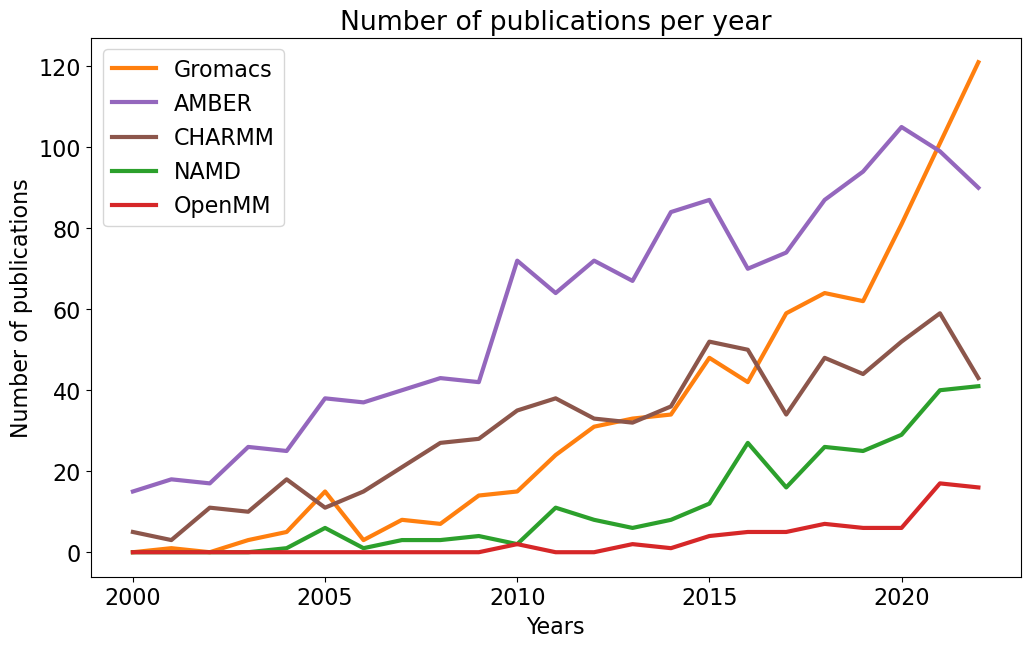

In [7]:
plt.rcParams.update({"font.size": 16})
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(df_md["years"], df_md["Gromacs"], color="C1", linewidth=3, label="Gromacs")
ax.plot(df_md["years"], df_md["AMBER"], color="C4", linewidth=3, label="AMBER")
ax.plot(df_md["years"], df_md["CHARMM"], color="C5", linewidth=3, label="CHARMM")
ax.plot(df_md["years"], df_md["NAMD"], color="C2", linewidth=3, label="NAMD")
ax.plot(df_md["years"], df_md["OpenMM"], color="C3", linewidth=3, label="OpenMM")
ax.set_title("Number of publications per year")
ax.set_xlabel("Years")
ax.set_ylabel("Number of publications")
fig.legend(loc=[0.1, 0.65])
fig.savefig("fig/number_of_MD_papers_per_year_per_engine.svg")

There are some caveats with this approach:

- `CHARMM` can be a MD engine, a forcefield or a tool to build initial topology (`CHARMM-gui`).
- `AMBER` can be a MD engine and a forcefield (and a fossilized tree resin).

## Watermark

In [8]:
%load_ext watermark
%watermark --python --machine
print("")
# Versions for jupyterlab, imported packages and watermark itself
%watermark --packages jupyterlab --iversions --watermark
# Name of conda environment
%watermark --conda

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.6.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-58-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit


jupyterlab: 3.5.2

matplotlib: 3.5.3
Bio       : 1.80
pandas    : 1.5.2

Watermark: 2.3.1

conda environment: mdda

